## Code to make Fig S3
Elena Savidge
<br>
3 Aug 2023

In [8]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime

In [9]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [10]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [11]:
#ther_pixel = pd.read_pickle('thermal_area_effectivepixel.pkl')
vis_pixel = pd.read_pickle('visible_area_effectivepixel_fixed') 

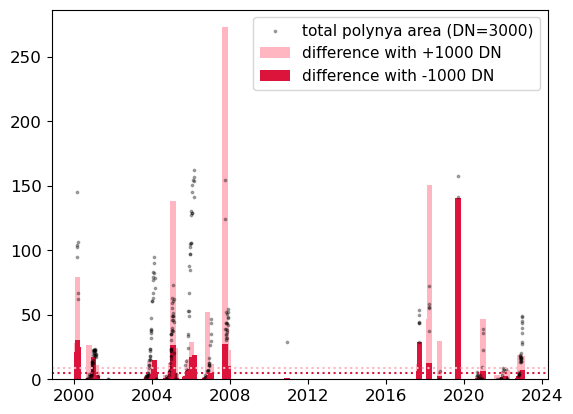

In [15]:
# vis
difftotalu = vis_pixel['utotal']-vis_pixel['total']
plt.bar(vis_pixel['Date'],difftotalu.dropna(),width=100,color='lightpink',label='difference with +1000 DN')

difftotall = vis_pixel['total']-vis_pixel['ltotal']
plt.bar(vis_pixel['Date'],difftotall.dropna(),width=100,color='crimson',label='difference with -1000 DN')

plt.scatter(vis_pixel['Date'],vis_pixel['total'],color='k',label='total polynya area (DN=3000)',s=3,alpha=0.3)
#plt.scatter(vis_pixel['Date'],vis_pixel['utotal'],color='lightpink',label='total polynya area (DN=4000)',s=3)
#plt.scatter(vis_pixel['Date'],vis_pixel['ltotal'],color='crimson',label='total polynya area (DN=2000)',s=3)

plt.axhline(y = difftotalu.mean(), color = 'lightpink', linestyle = ':')
plt.axhline(y = difftotall.mean(), color = 'crimson', linestyle = ':')
plt.legend(fontsize=11)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)

#plt.ylim(0,20)
#plt.show()

plt.savefig('DN_sensitivity_bar.png', format='png', dpi=400)

In [17]:
difftotalu.mean(),difftotall.mean(),

(8.657816214822423, 4.860103675130668)

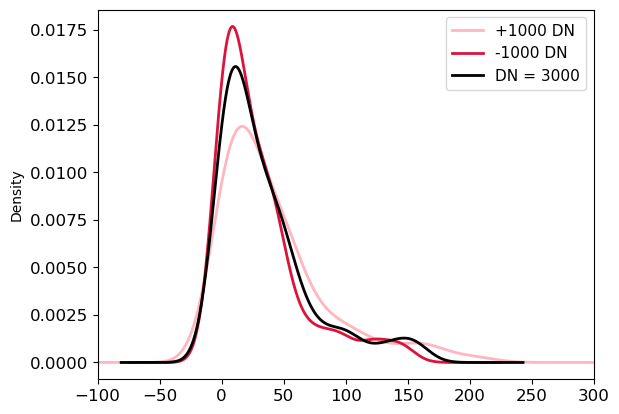

In [16]:
vis_pixel['utotal'].plot.density(color='lightpink',linewidth=2,label='+1000 DN')
vis_pixel['ltotal'].plot.density(color='crimson',linewidth=2,label='-1000 DN')
vis_pixel['total'].plot.density(color='k',linewidth=2,label='DN = 3000')

plt.xlim(-100,300)
plt.xticks(fontsize=12);plt.yticks(fontsize=12)
plt.legend(fontsize=11)
#plt.show()

plt.savefig('DN_sensitivity_density.png', format='png', dpi=400)

### Save panels and make fig in ppt

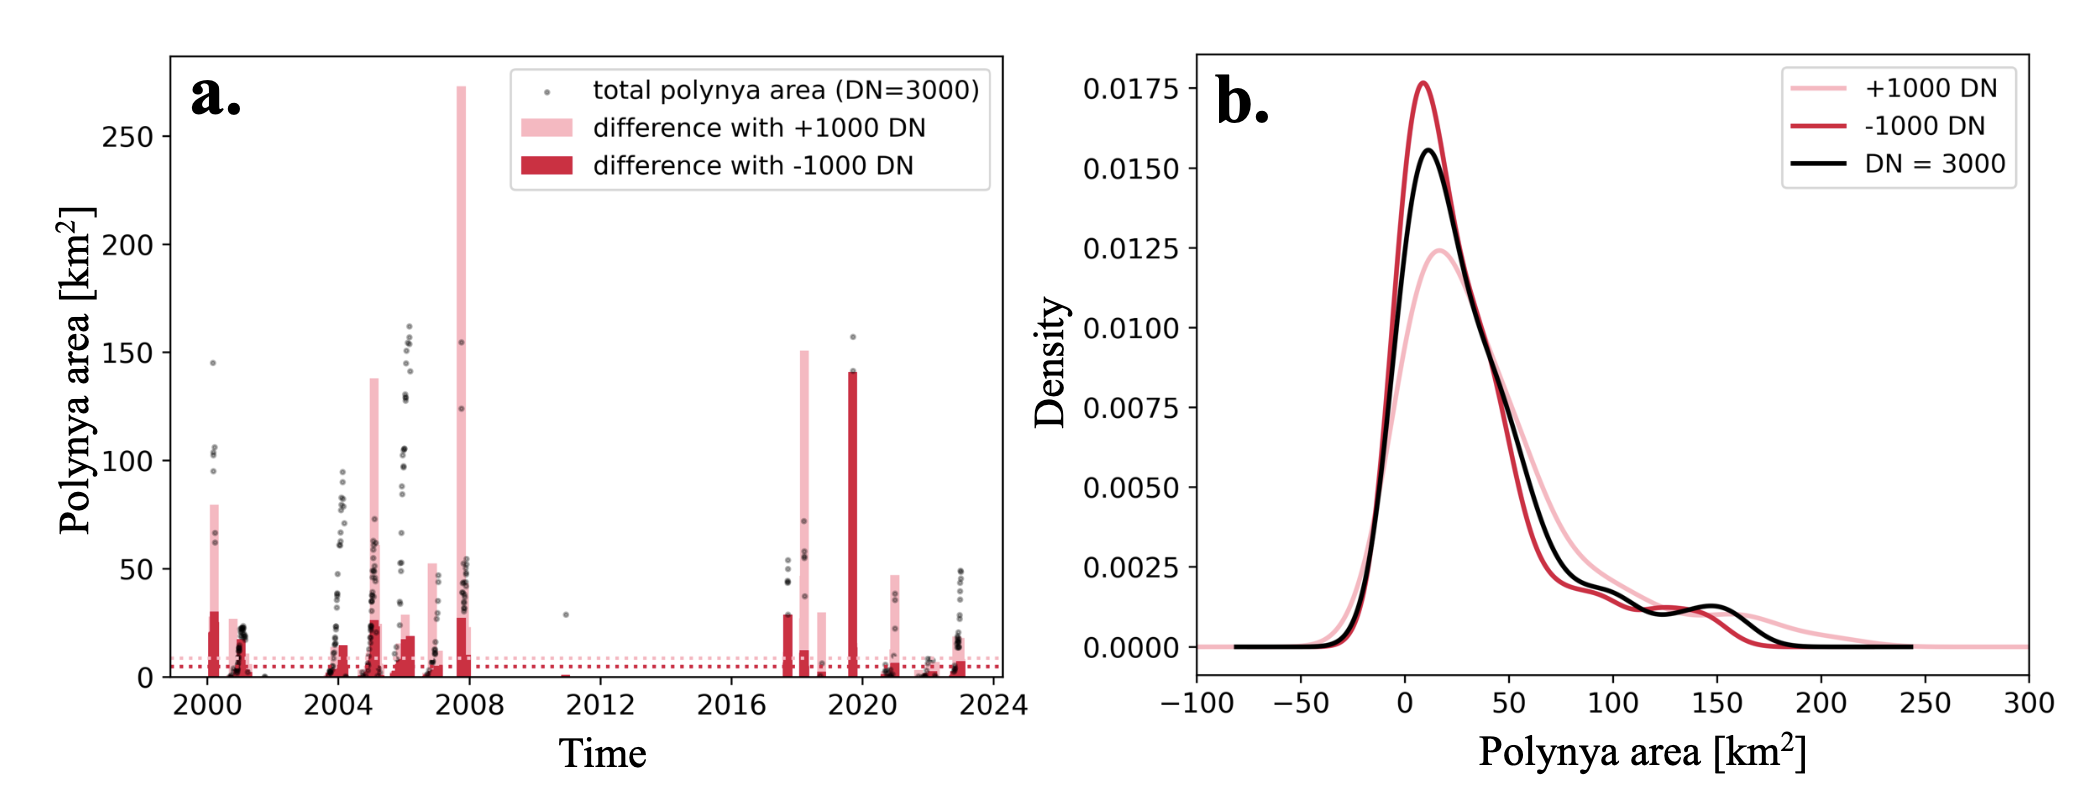